# Import Libraries

In [1]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
path_parent = os.path.dirname(os.getcwd())
sys.path.insert(0, path_parent+'/Telecom-Data-Analysis/scripts')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# !pip install openpyxl


In [3]:
from EDA import *
from data_preprocess import *
from data_clean import *

In [4]:
# df = pd.read_excel('../data/Week1_challenge_data_source.xlsx')
df_desc =  pd.read_excel('data/Field Descriptions.xlsx')
# df.to_pickle('../data/data_in_Dataframe.pkl')
df = pd.read_pickle('data/data_in_Dataframe.pkl')


# Explore Data

In [59]:
df.shape

(149010, 55)

In [6]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# the total amount of empty entries in each column with total percentage
df.isnull().sum()/df.shape[0]*100

Bearer Id                                   0.66
Start                                       0.00
Start ms                                    0.00
End                                         0.00
End ms                                      0.00
Dur. (ms)                                   0.00
IMSI                                        0.38
MSISDN/Number                               0.71
IMEI                                        0.38
Last Location Name                          0.77
Avg RTT DL (ms)                            18.55
Avg RTT UL (ms)                            18.54
Avg Bearer TP DL (kbps)                     0.00
Avg Bearer TP UL (kbps)                     0.00
TCP DL Retrans. Vol (Bytes)                58.76
TCP UL Retrans. Vol (Bytes)                64.43
DL TP < 50 Kbps (%)                         0.50
50 Kbps < DL TP < 250 Kbps (%)              0.50
250 Kbps < DL TP < 1 Mbps (%)               0.50
DL TP > 1 Mbps (%)                          0.50
UL TP < 10 Kbps (%) 

In [8]:
df.dtypes

Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [9]:
df['Bearer Id'].isnull().sum()

991

In [10]:
# drop the rows that have Bearer Id null
df.dropna(subset=['Bearer Id'],inplace=True)

In [11]:
# Columns having missing values
missing_categorical_columns = [col for col in df.columns if df[col].isnull().sum() > 0 and df[col].dtype=='object']
missing_non_categorical_columns = [col for col in df.columns if df[col].isnull().sum() > 0 and df[col].dtype !='object']

In [12]:
missing_percent = get_numerical_summary(df,missing_categorical_columns)


Last Location Name : 162 (0.109%)
Handset Manufacturer : 11 (0.007%)
Handset Type : 11 (0.007%)


In [13]:
get_value_counts(df)

----------------------------------
Last Location Name 

D41377B             80
D17085A             59
D72396C             57
9164566985995010    55
D73604C             55
                    ..
L61017C              1
T94246B              1
D72724B              1
D21664A              1
L88342B              1
Name: Last Location Name, Length: 45547, dtype: int64
----------------------------------
Handset Manufacturer 

Apple                               59440
Samsung                             40689
Huawei                              34353
undefined                            8960
Sony Mobile Communications Ab         969
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: Handset Manufacturer, Length: 170, dtype: int64
----------------------------------
Handset Type 

Huawei B528S-

In [14]:
df['Handset Type'].value_counts()[:10]

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9401
Apple iPhone 6 (A1586)           9004
undefined                        8960
Apple iPhone 7 (A1778)           6301
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4504
Apple iPhone X (A1901)           3809
Name: Handset Type, dtype: int64

In [15]:
df[missing_categorical_columns].describe()

,Last Location Name,Handset Manufacturer,Handset Type
count,148848,148999,148999
unique,45547,170,1393
top,D41377B,Apple,Huawei B528S-23A
freq,80,59440,19752


In [16]:
# we can add Missing to the missing categorical columns
df = add_missing(df,missing_categorical_columns)

In [17]:
df[missing_categorical_columns].isnull().sum()

Last Location Name      0
Handset Manufacturer    0
Handset Type            0
dtype: int64

In [18]:
data_description(df=df,df_desc=df_desc,cols=missing_non_categorical_columns)

IMSI ==  International Mobile Subscriber Identity
MSISDN/Number ==  MS International PSTN/ISDN Number of mobile - customer number
IMEI ==  International Mobile Equipment Identity
Avg RTT DL (ms) ==  Average Round Trip Time measurement Downlink direction (msecond)
Avg RTT UL (ms) ==  Average Round Trip Time measurement Uplink direction (msecond)
TCP DL Retrans. Vol (Bytes) ==  TCP volume of Downlink packets detected as retransmitted (bytes)
TCP UL Retrans. Vol (Bytes) ==  TCP volume of Uplink packets detected as retransmitted (bytes)
DL TP < 50 Kbps (%) ==  Duration ratio when Bearer Downlink Throughput < ….
50 Kbps < DL TP < 250 Kbps (%) ==  Duration ratio when Bearer Downlink Throughput range is …
250 Kbps < DL TP < 1 Mbps (%) ==  Duration ratio when Bearer Downlink Throughput range is …
DL TP > 1 Mbps (%) ==  Duration ratio when Bearer Downlink Throughput > ….
UL TP < 10 Kbps (%) ==  Duration ratio when Bearer Uplink Throughput < ….
10 Kbps < UL TP < 50 Kbps (%) ==  Duration ratio wh

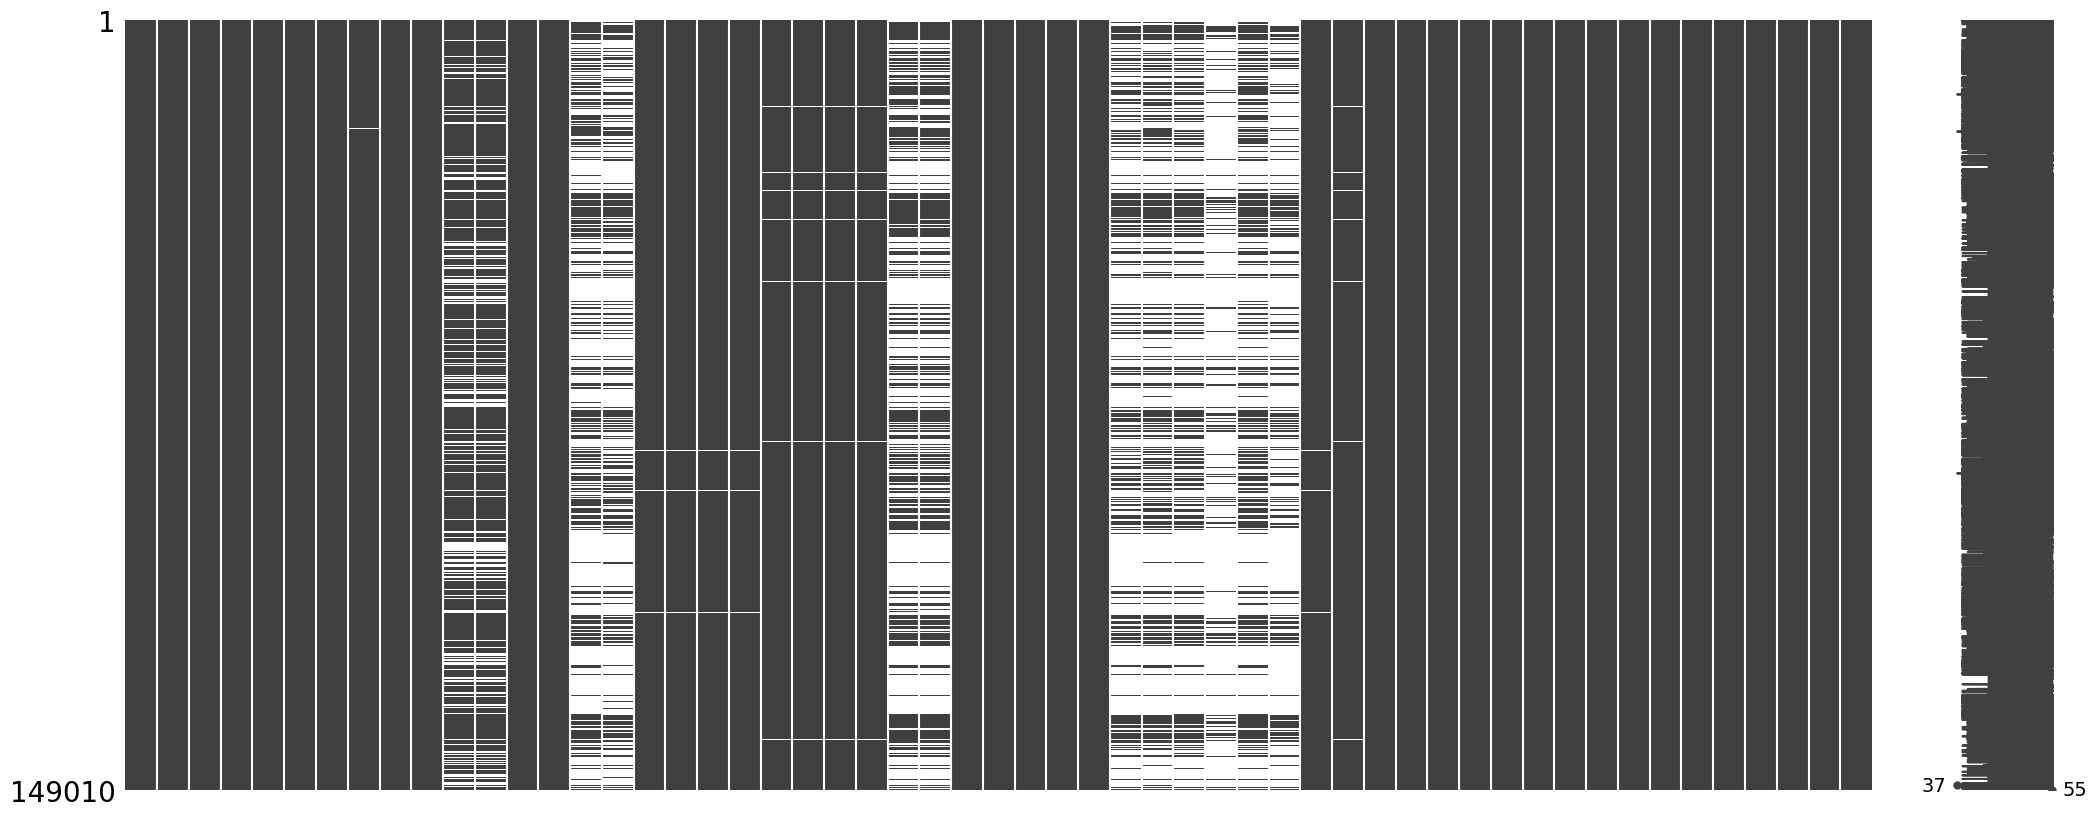

<Figure size 10000x6000 with 0 Axes>

In [20]:
plot_missingno(df)

In [19]:
noncat_missing_percent = get_numerical_summary(df=df,missing_cols=missing_non_categorical_columns)

IMSI : 9 (0.006%)
MSISDN/Number : 504 (0.338%)
IMEI : 11 (0.007%)
Avg RTT DL (ms) : 27685 (18.579%)
Avg RTT UL (ms) : 27666 (18.567%)
TCP DL Retrans. Vol (Bytes) : 87906 (58.993%)
TCP UL Retrans. Vol (Bytes) : 96368 (64.672%)
DL TP < 50 Kbps (%) : 716 (0.481%)
50 Kbps < DL TP < 250 Kbps (%) : 716 (0.481%)
250 Kbps < DL TP < 1 Mbps (%) : 716 (0.481%)
DL TP > 1 Mbps (%) : 716 (0.481%)
UL TP < 10 Kbps (%) : 770 (0.517%)
10 Kbps < UL TP < 50 Kbps (%) : 770 (0.517%)
50 Kbps < UL TP < 300 Kbps (%) : 770 (0.517%)
UL TP > 300 Kbps (%) : 770 (0.517%)
HTTP DL (Bytes) : 81228 (54.512%)
HTTP UL (Bytes) : 81578 (54.747%)
Nb of sec with 125000B < Vol DL : 97000 (65.096%)
Nb of sec with 1250B < Vol UL < 6250B : 92448 (62.041%)
Nb of sec with 31250B < Vol DL < 125000B : 93162 (62.521%)
Nb of sec with 37500B < Vol UL : 129375 (86.823%)
Nb of sec with 6250B < Vol DL < 31250B : 87987 (59.048%)
Nb of sec with 6250B < Vol UL < 37500B : 111135 (74.582%)
Nb of sec with Vol DL < 6250B : 717 (0.481%)
Nb of sec

In [20]:
df.isnull().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             9
MSISDN/Number                                  504
IMEI                                            11
Last Location Name                               0
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)             

In [21]:
df[missing_non_categorical_columns].describe()

,IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),...,HTTP DL (Bytes),HTTP UL (Bytes),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B
count,"149,001.00","148,506.00","148,999.00","121,325.00","121,344.00","61,104.00","52,642.00","148,294.00","148,294.00","148,294.00",...,"67,782.00","67,432.00","52,010.00","56,562.00","55,848.00","19,635.00","61,023.00","37,875.00","148,293.00","148,239.00"
mean,"208,201,639,769,546.97","41,906,541,782.21","48,479,962,865,752.38",106.10,17.66,"20,944,849.29","768,680.31",92.86,3.06,1.72,...,"115,576,916.45","3,272,568.48",995.37,342.75,816.98,149.86,972.58,142.15,"3,730.06","4,031.93"
std,"21,518,961,390.99","2,450,975,846,357.30","22,420,066,365,943.95",586.06,84.87,"182,860,806.55","26,630,694.96",13.04,6.21,4.16,...,"968,367,616.34","19,676,986.02","2,549.32","1,451.54","1,849.24","1,222.51","1,954.69",996.97,"9,195.32","10,184.82"
min,"204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,2.00,1.00,0.00,0.00,0.00,...,40.00,40.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,"208,201,401,263,920.00","33,651,311,444.25","35,460,708,897,832.00",32.00,2.00,"35,651.75","4,648.25",91.00,0.00,0.00,...,"114,512.50","24,672.00",20.00,10.00,26.00,2.00,39.00,3.00,87.00,106.00
50%,"208,201,546,331,017.00","33,663,708,556.00","35,722,106,561,183.00",45.00,5.00,"574,618.50","20,985.50",100.00,0.00,0.00,...,"1,988,829.00","234,074.50",130.00,53.00,167.00,8.00,292.00,8.00,201.00,216.00
75%,"208,201,771,620,051.00","33,683,515,176.75","86,119,704,676,500.00",69.00,15.00,"3,792,758.75","84,386.75",100.00,4.00,1.00,...,"25,826,577.50","1,569,300.25",704.00,205.00,767.00,35.00,"1,102.00",32.00,"2,651.00","2,442.50"
max,"214,074,303,349,628.00","882,397,108,489,451.00","99,001,201,327,774.00","96,923.00","7,120.00","4,294,425,570.00","2,908,226,006.00",100.00,93.00,100.00,...,"72,530,636,168.00","1,491,889,672.00","81,476.00","85,412.00","58,525.00","50,553.00","66,913.00","49,565.00","604,061.00","604,122.00"


In [22]:
# for this columns their mean is equal to (nearly) their median so they have 
# normal distribution and we can impute them using the mean or median
normal_dist_cols = ['IMSI']

In [23]:
df = impute_normal_dist_cols(df=df,cols=normal_dist_cols)

In [24]:
df[normal_dist_cols].isnull().sum()

IMSI    0
dtype: int64

In [25]:
print(len(missing_non_categorical_columns))
missing_non_categorical_columns = set(missing_non_categorical_columns) - set(normal_dist_cols)
print(len(missing_non_categorical_columns))


25
24


In [26]:
missing_non_categorical_columns = list(missing_non_categorical_columns)
missing_non_categorical_columns.sort()

In [27]:
df[missing_non_categorical_columns].isnull().sum()/df.shape[0]*100

10 Kbps < UL TP < 50 Kbps (%)               0.52
250 Kbps < DL TP < 1 Mbps (%)               0.48
50 Kbps < DL TP < 250 Kbps (%)              0.48
50 Kbps < UL TP < 300 Kbps (%)              0.52
Avg RTT DL (ms)                            18.58
Avg RTT UL (ms)                            18.57
DL TP < 50 Kbps (%)                         0.48
DL TP > 1 Mbps (%)                          0.48
HTTP DL (Bytes)                            54.51
HTTP UL (Bytes)                            54.75
IMEI                                        0.01
MSISDN/Number                               0.34
Nb of sec with 125000B < Vol DL            65.10
Nb of sec with 1250B < Vol UL < 6250B      62.04
Nb of sec with 31250B < Vol DL < 125000B   62.52
Nb of sec with 37500B < Vol UL             86.82
Nb of sec with 6250B < Vol DL < 31250B     59.05
Nb of sec with 6250B < Vol UL < 37500B     74.58
Nb of sec with Vol DL < 6250B               0.48
Nb of sec with Vol UL < 1250B               0.52
TCP DL Retrans. Vol 

In [28]:
df_temp = df[missing_non_categorical_columns].isnull().sum()/df.shape[0]*100
missing_less_cols = []
final_missing_cols = []
for i,x in df_temp.items():
    if x <1:
        missing_less_cols.append(i)
    else:
        final_missing_cols.append(i)

In [29]:
# columns with missing value that is less than 1%
df[missing_less_cols].isnull().sum()/df.shape[0]*100


10 Kbps < UL TP < 50 Kbps (%)    0.52
250 Kbps < DL TP < 1 Mbps (%)    0.48
50 Kbps < DL TP < 250 Kbps (%)   0.48
50 Kbps < UL TP < 300 Kbps (%)   0.52
DL TP < 50 Kbps (%)              0.48
DL TP > 1 Mbps (%)               0.48
IMEI                             0.01
MSISDN/Number                    0.34
Nb of sec with Vol DL < 6250B    0.48
Nb of sec with Vol UL < 1250B    0.52
UL TP < 10 Kbps (%)              0.52
UL TP > 300 Kbps (%)             0.52
dtype: float64

In [30]:
# columns with missing value that is more than 1%
df[final_missing_cols].isnull().sum()/df.shape[0]*100


Avg RTT DL (ms)                            18.58
Avg RTT UL (ms)                            18.57
HTTP DL (Bytes)                            54.51
HTTP UL (Bytes)                            54.75
Nb of sec with 125000B < Vol DL            65.10
Nb of sec with 1250B < Vol UL < 6250B      62.04
Nb of sec with 31250B < Vol DL < 125000B   62.52
Nb of sec with 37500B < Vol UL             86.82
Nb of sec with 6250B < Vol DL < 31250B     59.05
Nb of sec with 6250B < Vol UL < 37500B     74.58
TCP DL Retrans. Vol (Bytes)                58.99
TCP UL Retrans. Vol (Bytes)                64.67
dtype: float64

In [31]:
# we can see select those with minimum null percentage and impute them using their median
df = impute_skewed(df=df,cols=missing_less_cols)

In [32]:
df[missing_less_cols].isnull().sum()

10 Kbps < UL TP < 50 Kbps (%)     0
250 Kbps < DL TP < 1 Mbps (%)     0
50 Kbps < DL TP < 250 Kbps (%)    0
50 Kbps < UL TP < 300 Kbps (%)    0
DL TP < 50 Kbps (%)               0
DL TP > 1 Mbps (%)                0
IMEI                              0
MSISDN/Number                     0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
UL TP < 10 Kbps (%)               0
UL TP > 300 Kbps (%)              0
dtype: int64

In [33]:
# we can impute these features using KNN imputing or the novel approach of multivariate feature imputation [we can evaluate their performamnce later]
df[final_missing_cols].isnull().sum()

Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              97000
Nb of sec with 1250B < Vol UL < 6250B        92448
Nb of sec with 31250B < Vol DL < 125000B     93162
Nb of sec with 37500B < Vol UL              129375
Nb of sec with 6250B < Vol DL < 31250B       87987
Nb of sec with 6250B < Vol UL < 37500B      111135
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
dtype: int64

# Encoding

### Frequency Encoding
- I used frequency encoding because the number of occurence is an important information in the categorical features as it represents customers choice

In [34]:
categorical_columns = [col for col in df.columns if  df[col].dtype=='object']

In [35]:
categorical_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [36]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9164566995485190,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"13,042,425,979,329,300,480.00",2019-04-29 07:28:41,615.00,2019-04-30 00:01:49,407.00,"59,587.00","208,201,402,604,057.00","33,668,648,496.00","35,332,510,508,318.00",T85721A,...,"6,550,499.00","18,003,146.00","22,468,983.00","7,149,728.00","784,435,351.00","12,724,751.00","321,383,162.00","14,890,486.00","53,745,392.00","819,016,468.00"
149996,"7,277,825,670,196,679,680.00",2019-04-29 07:28:42,451.00,2019-04-30 06:02:33,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,...,"16,191,667.00","11,763,428.00","17,883,703.00","19,678,161.00","526,609,673.00","9,197,207.00","3,264,510.00","13,487,416.00","57,628,851.00","574,175,259.00"
149997,"7,349,883,264,234,609,664.00",2019-04-29 07:28:42,483.00,2019-04-30 10:41:33,187.00,"97,970.00","208,201,908,153,249.00","33,663,449,963.00","35,660,508,296,467.00",D10223C,...,"13,877,234.00","8,288,284.00","19,350,146.00","21,293,148.00","626,893,062.00","4,735,033.00","712,180,387.00","2,457,758.00","39,135,081.00","666,648,844.00"
149998,"13,114,483,573,367,300,096.00",2019-04-29 07:28:43,283.00,2019-04-30 10:46:12,810.00,"98,249.00","208,201,711,161,187.00","33,621,890,103.00","35,721,209,870,907.00",T51102A,...,"22,660,510.00","1,855,903.00","9,963,942.00","5,065,760.00","553,539,484.00","13,394,316.00","121,100,856.00","11,314,729.00","34,912,224.00","592,786,405.00"


In [37]:
df = frequency_encoder(df=df,cols=categorical_columns)

# Data Imputation


In [38]:
# we can remove the encoded features
df = drop_cols(df=df,cols=categorical_columns)

In [39]:
total_cols_without_datetime= [x for x in df.columns if df[x].dtype != 'datetime64[ns]']

### 1. KNN Imputer

In [40]:
from sklearn.impute import KNNImputer
df_knn = df[total_cols_without_datetime].copy()

In [41]:
# Initializing KNNImputer
knn = KNNImputer()

# knn.fit(df_knn)

In [42]:
# df_knn = knn.transform(df_knn)

In [64]:
df_knn.shape

(149010, 53)

In [62]:
df_knn = df_knn.drop(df_knn[df_knn['Bearer Id'] == 7349883264156584960.00].index)

In [ ]:
df_knn = pd.DataFrame(data = df_knn,columns=total_cols_without_datetime)
df_knn.to_pickle('data/df_knn.pkl')

### 2. Multi-variate Feature Imputer

In [43]:
df_iterative = df[total_cols_without_datetime].copy()

In [44]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_iterative)
df_iterative = imp.transform(df_iterative)

In [45]:
df_iterative = pd.DataFrame(data = df_iterative,columns=total_cols_without_datetime)

In [46]:
df_iterative.to_pickle('data/df_iterative.pkl')

### 3. Median Imputer

In [47]:
df_median = df[total_cols_without_datetime].copy()


In [48]:
df_median = impute_skewed(df=df_median,cols=final_missing_cols)

In [49]:
df_median.to_pickle('data/df_median.pkl')

# Scaling and Standardization

### minmax scaling

In [50]:
df_median=pd.read_pickle('data/df_median.pkl')
df_iterative=pd.read_pickle('data/df_iterative.pkl')
df_knn=pd.read_pickle('data/df_knn.pkl')

In [51]:
columns = df_median.columns
df_median = scale_dataframe(df=df_median,cols=columns)
df_iterative = scale_dataframe(df=df_iterative,cols=columns)
df_knn = scale_dataframe(df=df_knn,cols=columns)

In [52]:
df_iterative.to_pickle('data/scaled_df_iterative.pkl')
df_median.to_pickle('data/scaled_df_median.pkl')
df_knn.to_pickle('data/scaled_df_knn.pkl')